In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from shapely import Point
from statannotations.Annotator import Annotator
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':200})
sns.set_palette(sns.color_palette("colorblind"))

In [569]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# "Training Curves" Attack

In [533]:
freemove_tfidf_refinement = pd.read_csv('results_recursive_search_freemove.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
freemove_tfidf_refinement['data'] = 'freemove'
freemove_tfidf_refinement['step'] = 'tf_idf'

geolife_tfidf_refinement = pd.read_csv('results_recursive_search_geolife.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
geolife_tfidf_refinement['data'] = 'geolife'
geolife_tfidf_refinement['step'] = 'tf_idf'

attack_metrics = pd.concat([pd.read_csv('attack_metrics.csv', sep=";"), freemove_tfidf_refinement.tail(1), geolife_tfidf_refinement.tail(1)])

Text(-0.3, 0.08, '0.07')

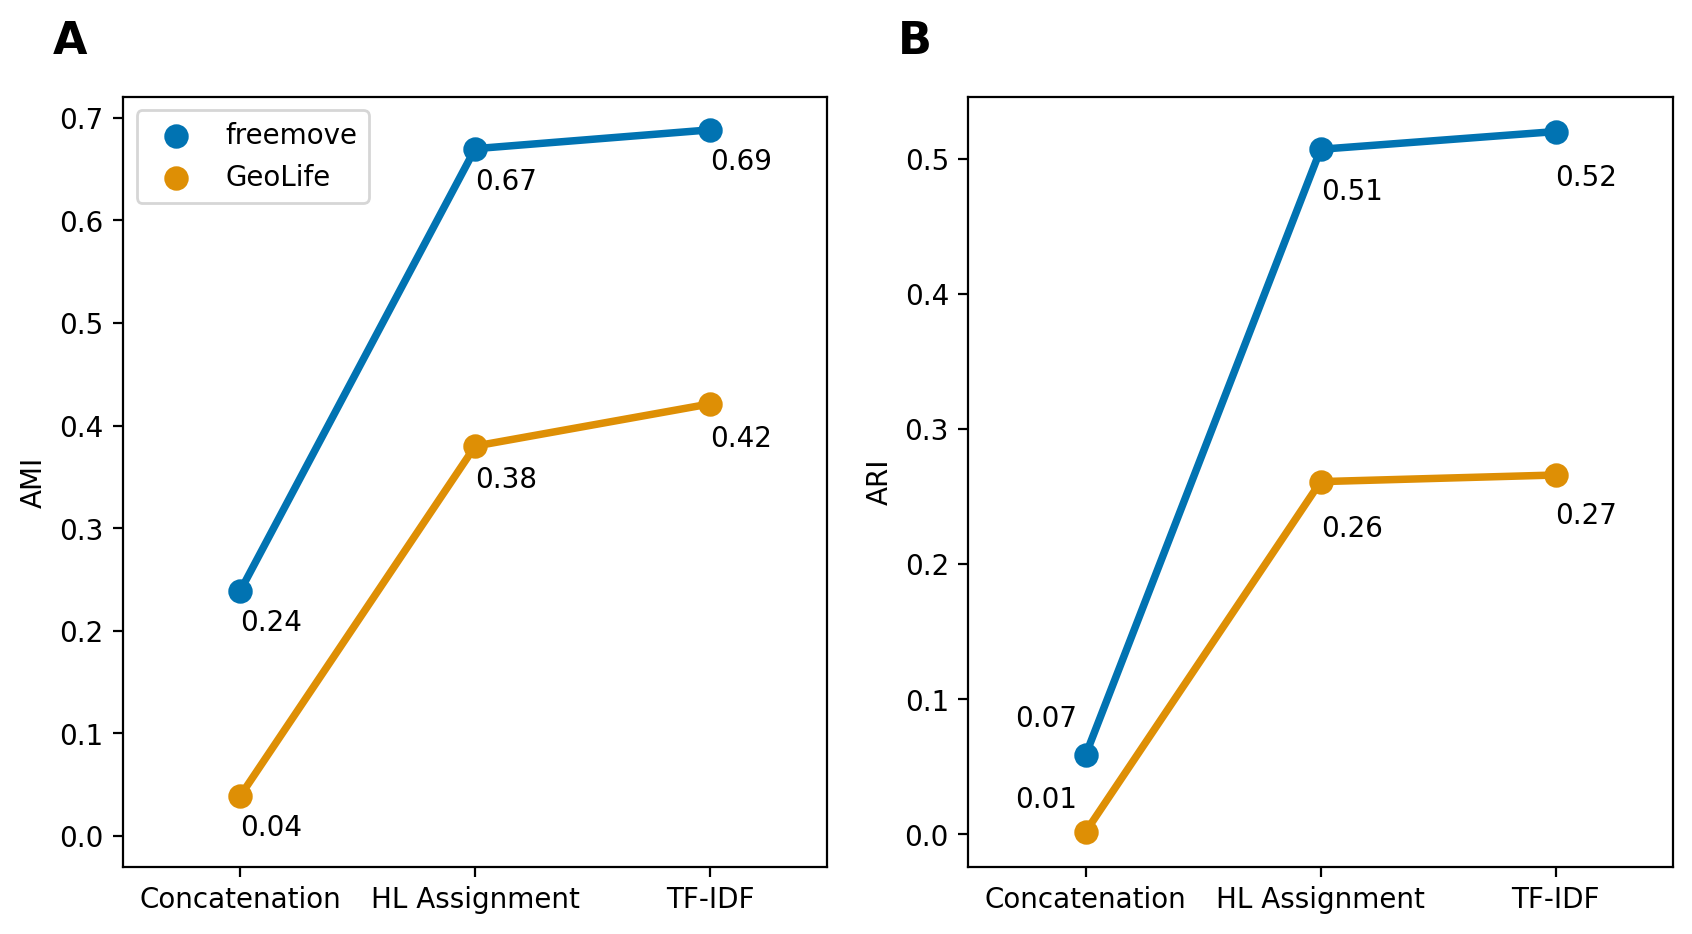

In [534]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1 = sns.pointplot(x="step", y="ami", data=attack_metrics, hue='data', ax=ax1)
ax2 = sns.pointplot(x="step", y="ari", data=attack_metrics, hue='data', ax=ax2)
        
ax2.legend([],[], frameon=False)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=['freemove', 'GeoLife'])


ax1.set_xlabel("")
ax2.set_xlabel("")
ax2.set_ylabel("ARI")
ax1.set_ylabel("AMI")

# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')
    
ax1.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

ax1.set_ylim(-0.03)
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='freemove'").ami,2))]
[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='geolife'").ami,2))]

[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='freemove'").ari,2)[1:])]
[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='geolife'").ari,2)[1:])]

ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='geolife'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='geolife'").ari + 0.01,2).iloc[0])
ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='freemove'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='freemove'").ari + 0.01,2).iloc[0])

# Reidentification evaluation on raw data

In [399]:
pd.concat([pd.read_csv('freemove_nrp_1.csv'),
           pd.read_csv('freemove_nrp_4.csv'),
           pd.read_csv('freemove_nrp_10.csv'),
           pd.read_csv('freemove_private_nrp_1.csv'),
           pd.read_csv('freemove_private_nrp_4.csv'),
           pd.read_csv('freemove_private_nrp_10.csv'),
           pd.read_csv('freemove_500tessellation_nrp_1.csv'),
           pd.read_csv('freemove_500tessellation_nrp_4.csv'),
           pd.read_csv('freemove_500tessellation_nrp_10.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_1.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_4.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_10.csv'),
           pd.read_csv('geolife_nrp_1.csv'),
           pd.read_csv('geolife_nrp_4.csv'),
           pd.read_csv('geolife_nrp_10.csv'),
          pd.read_csv('geolife_private_nrp_1.csv'),
           pd.read_csv('geolife_private_nrp_4.csv'),
           pd.read_csv('geolife_private_nrp_10.csv'),
           pd.read_csv('geolife_500tessellation_nrp_1.csv'),
           pd.read_csv('geolife_500tessellation_nrp_4.csv'),
           pd.read_csv('geolife_500tessellation_nrp_10.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_1.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_4.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_10.csv')], 
          keys=['freemove',
                'freemove',
                'freemove',
                'freemove_private',
                'freemove_private',
                'freemove_private',
                'freemove_500tessellation',
                'freemove_500tessellation',
                'freemove_500tessellation',
                'freemove_private_500tessellation',
                'freemove_private_500tessellation',
                'freemove_private_500tessellation',
                'geolife',
                'geolife',
                'geolife',
               'geolife_private',
                'geolife_private',
                'geolife_private',
                'geolife_500tessellation',
                'geolife_500tessellation',
                'geolife_500tessellation',
                'geolife_private_500tessellation',
                'geolife_private_500tessellation',
                'geolife_private_500tessellation']).reset_index(0, names="data").reset_index(drop=True).to_csv('reident_scores.csv', index=False)
           

In [535]:
scores = pd.read_csv('reident_scores.csv')
scores['user_id'] = scores.user_id.astype(str)

In [543]:
data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.85)]

,data,user_id,precision,recall,pr_mean,f_score,nr_points,rand_entropy,ale,n_trips,hour_of_day,radius_of_gyration,fscore_user_mean,precision_user_mean,recall_user_mean
70600,geolife,9,1.000000,0.979592,0.989796,0.989691,4,3.000000,1.322246,49.0,11.653061,1.570062,0.989400,0.998824,0.980204
70638,geolife,9,1.000000,0.979592,0.989796,0.989691,4,3.000000,1.322246,49.0,11.653061,1.570062,0.989400,0.998824,0.980204
70628,geolife,9,1.000000,0.979592,0.989796,0.989691,4,3.000000,1.322246,49.0,11.653061,1.570062,0.989400,0.998824,0.980204
70629,geolife,9,1.000000,0.979592,0.989796,0.989691,4,3.000000,1.322246,49.0,11.653061,1.570062,0.989400,0.998824,0.980204
70630,geolife,9,1.000000,0.979592,0.989796,0.989691,4,3.000000,1.322246,49.0,11.653061,1.570062,0.989400,0.998824,0.980204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72470,geolife,68,0.494382,0.888889,0.691635,0.635379,4,5.209453,8.020772,99.0,11.454545,180.538560,0.610802,0.494226,0.821010
72471,geolife,68,0.494382,0.888889,0.691635,0.635379,4,5.209453,8.020772,99.0,11.454545,180.538560,0.610802,0.494226,0.821010
72472,geolife,68,0.502762,0.919192,0.710977,0.650000,4,5.209453,8.020772,99.0,11.454545,180.538560,0.610802,0.494226,0.821010
72473,geolife,68,0.494382,0.888889,0.691635,0.635379,4,5.209453,8.020772,99.0,11.454545,180.538560,0.610802,0.494226,0.821010



freemove
Mean PRECISION of top 25% of users: 0.96
Mean RECALL of top 25% of users: 0.86
Mean N_trips of top 25% of users: 21.29

GeoLife
Mean PRECISION of top 25% of users: 0.77
Mean RECALL of top 25% of users: 0.66
Mean N_trips of top 25% of users: 113.13


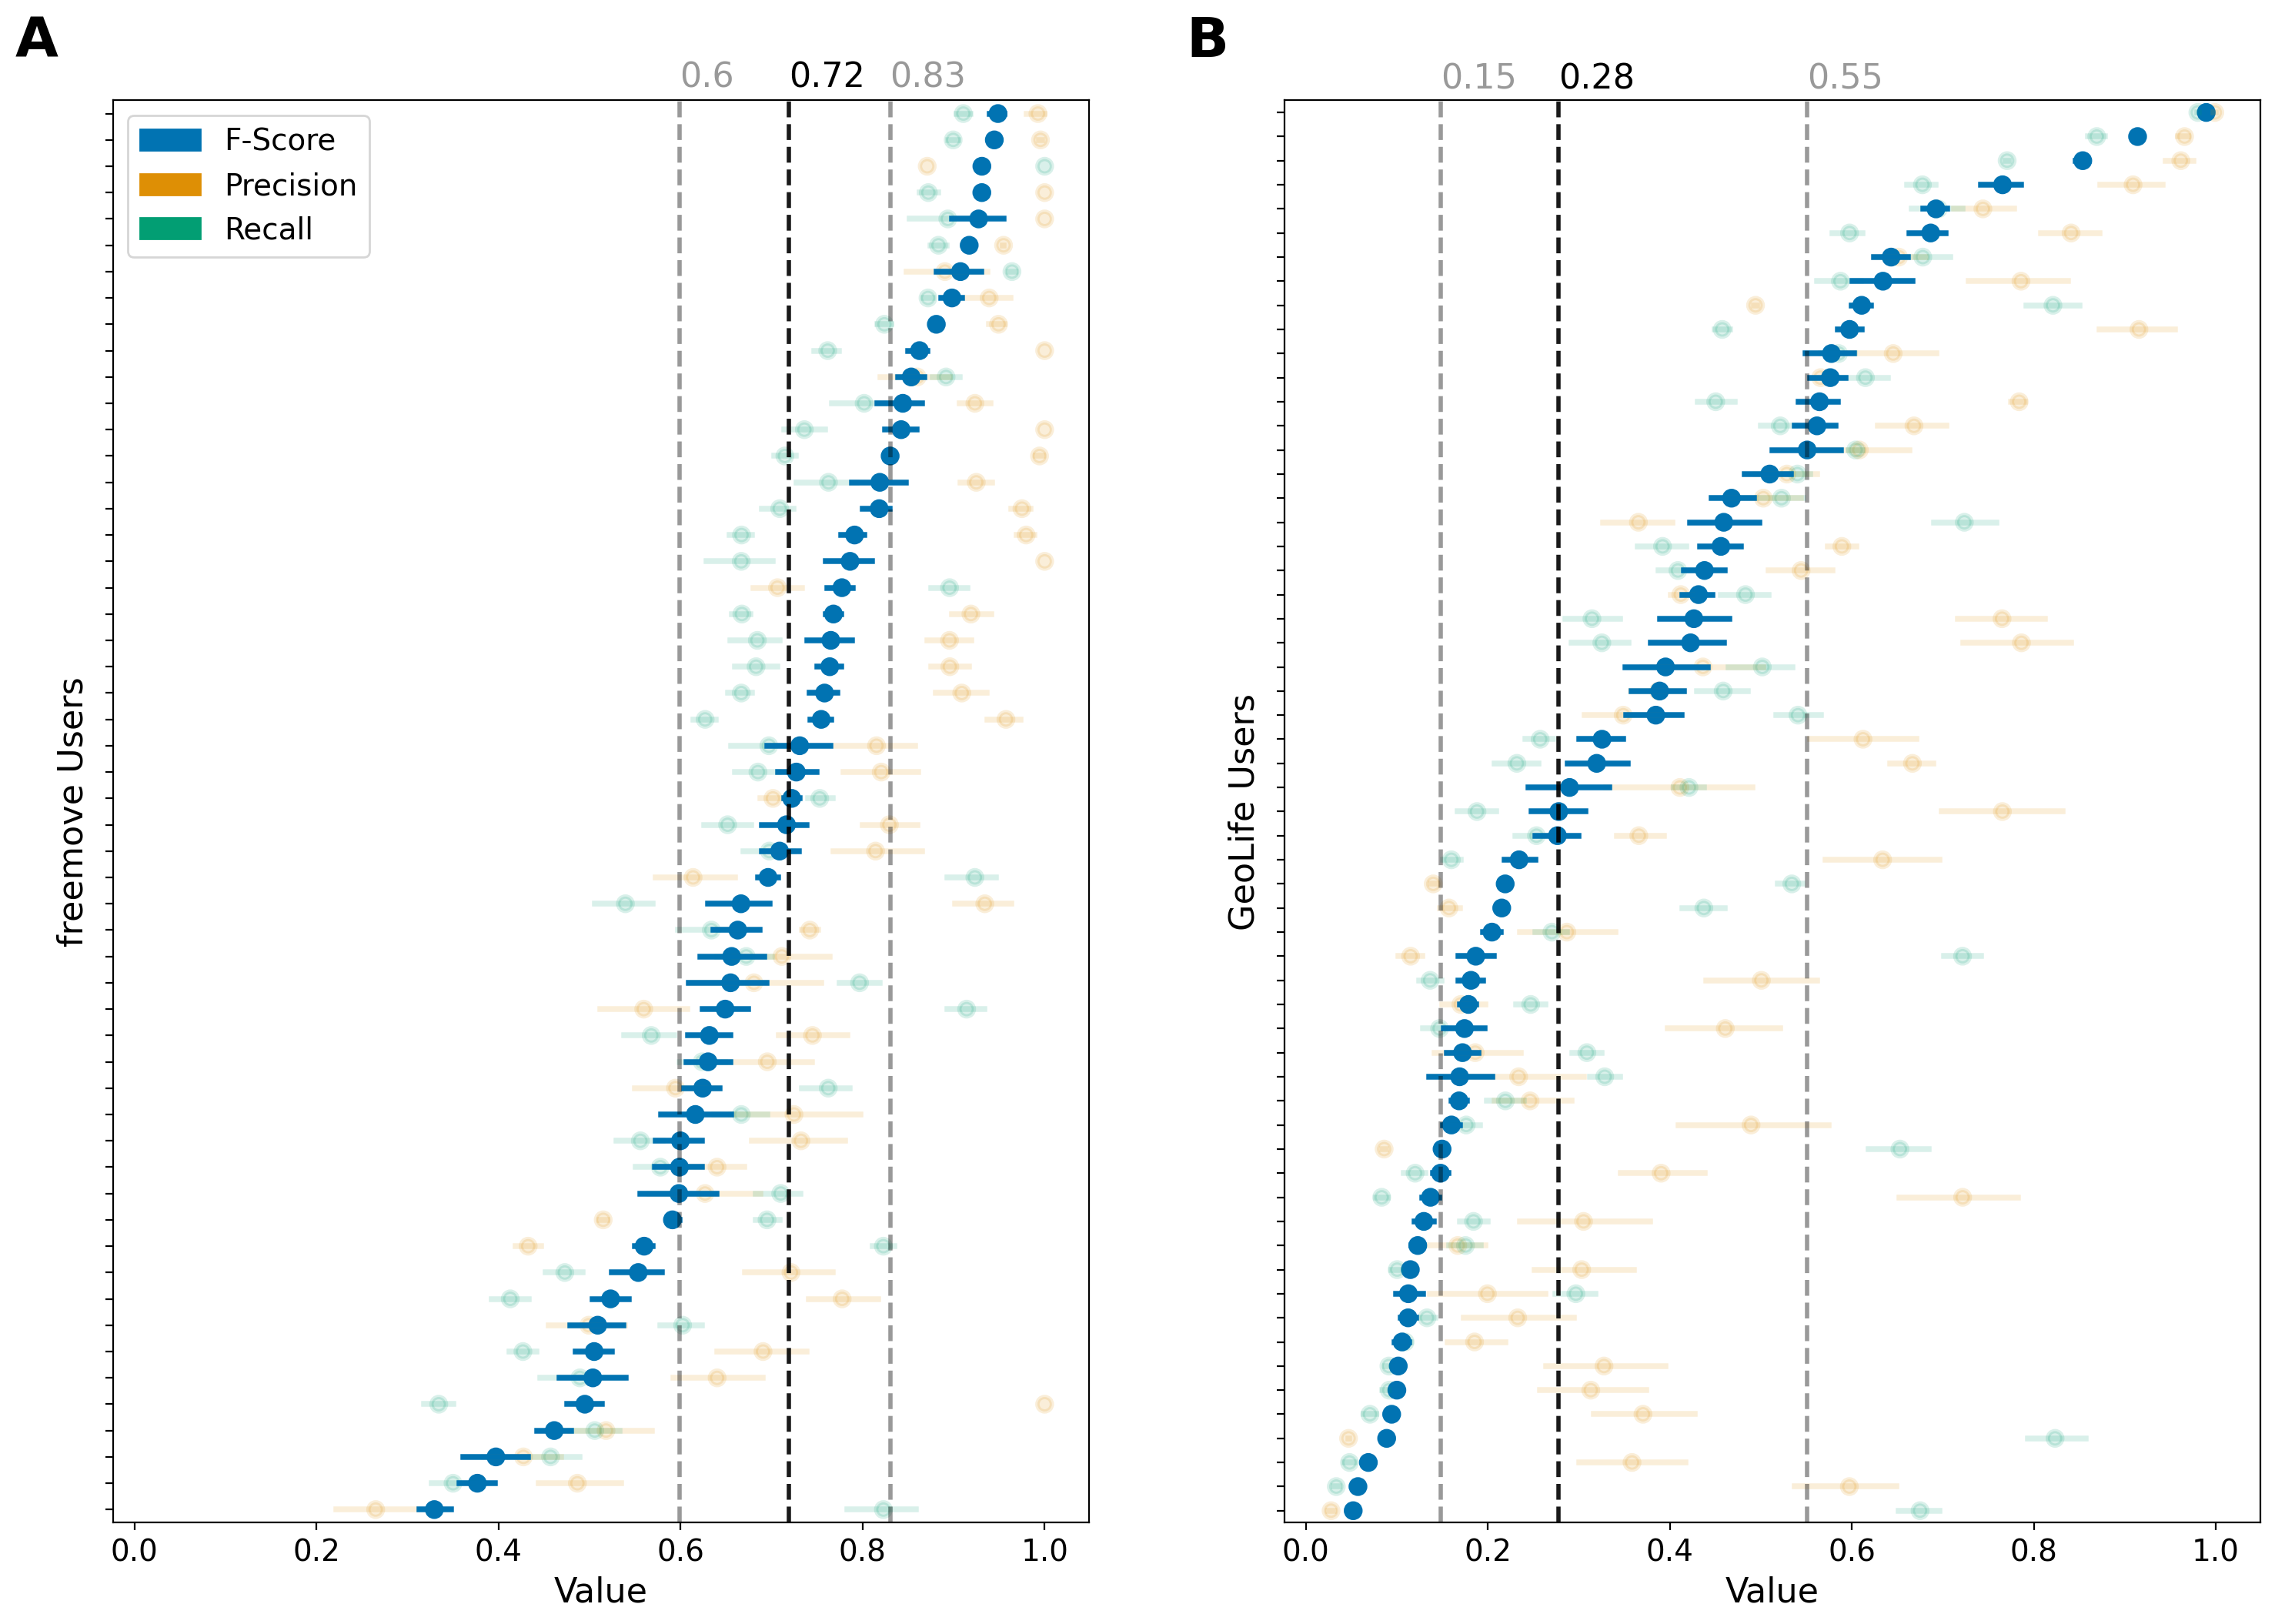

In [574]:
data_freemove = scores.query("data=='freemove' and nr_points==4").sort_values('fscore_user_mean', ascending=False)
data_geolife = scores.query("data=='geolife' and nr_points==4").sort_values('fscore_user_mean', ascending=False)

print("\nfreemove")
print('Mean PRECISION of top 25% of users:', np.round(data_freemove[data_freemove.fscore_user_mean >= data_freemove.fscore_user_mean.quantile(0.75)].precision.mean(),2))
print('Mean RECALL of top 25% of users:', np.round(data_freemove[data_freemove.fscore_user_mean >= data_freemove.fscore_user_mean.quantile(0.75)].recall.mean(),2))
print('Mean N_trips of top 25% of users:', np.round(data_freemove[data_freemove.fscore_user_mean >= data_freemove.fscore_user_mean.quantile(0.75)].n_trips.mean(),2))

print("\nGeoLife")
print('Mean PRECISION of top 25% of users:', np.round(data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].precision.mean(),2))
print('Mean RECALL of top 25% of users:', np.round(data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].recall.mean(),2))
print('Mean N_trips of top 25% of users:', np.round(data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].n_trips.mean(),2))


data_geolife.fscore_user_mean.quantile(0.25)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,12), sharey=False, sharex=True)

ax = sns.pointplot(x="precision", y="user_id", data=data_freemove, s=100, color=sns.color_palette("colorblind").as_hex()[1], label="Precision", join=False, ax=ax1)
ax = sns.pointplot(x="recall", y="user_id", data=data_freemove, s=100, color=sns.color_palette("colorblind").as_hex()[2], label="Recall", join=False, ax=ax1)
plt.setp(ax1.collections, alpha=.15) #for the markers
plt.setp(ax1.lines, alpha=.15)
ax = sns.pointplot(x="f_score", y="user_id", data=data_freemove, s=100, color=sns.color_palette("colorblind").as_hex()[0], join=False, ax=ax1)

ax = sns.pointplot(x="precision", y="user_id", color=sns.color_palette("colorblind").as_hex()[1], data=data_geolife, s=100, join=False, ax=ax2)
ax = sns.pointplot(x="recall", y="user_id", color=sns.color_palette("colorblind").as_hex()[2], data=data_geolife, s=100, join=False, ax=ax2)
plt.setp(ax2.collections, alpha=.15) #for the markers
plt.setp(ax2.lines, alpha=.15)
ax = sns.pointplot(x="f_score", y="user_id", data=data_geolife, s=100, color=sns.color_palette("colorblind").as_hex()[0], join=False, ax=ax2)


fscore_q25_mean = data_freemove.fscore_user_mean.quantile(0.25)
fscore_q5_mean = data_freemove.fscore_user_mean.quantile(0.5)
fscore_q75_mean = data_freemove.fscore_user_mean.quantile(0.75)
ax1.axvline(fscore_q25_mean, color='k', ls='--', lw=2, alpha=0.4)
ax1.axvline(fscore_q5_mean, color='k', ls='--', lw=2, alpha=0.9)
ax1.axvline(fscore_q75_mean, color='k', ls='--', lw=2, alpha=0.4)
ax1.text(x=fscore_q25_mean, y=-1, s=np.round(fscore_q25_mean,2), fontsize=16, alpha=0.4)
ax1.text(x=fscore_q5_mean, y=-1, s=np.round(fscore_q5_mean,2), fontsize=16)
ax1.text(x=fscore_q75_mean, y=-1, s=np.round(fscore_q75_mean,2), fontsize=16, alpha=0.4)

fscore_q25_mean = data_geolife.fscore_user_mean.quantile(0.25)
fscore_q5_mean = data_geolife.fscore_user_mean.quantile(0.5)
fscore_q75_mean = data_geolife.fscore_user_mean.quantile(0.75)
ax2.axvline(fscore_q25_mean, color='k', ls='--', lw=2, alpha=0.4)
ax2.axvline(fscore_q5_mean, color='k', ls='--', lw=2, alpha=0.9)
ax2.axvline(fscore_q75_mean, color='k', ls='--', lw=2, alpha=0.4)
ax2.text(x=fscore_q25_mean, y=-1, s=np.round(fscore_q25_mean,2), fontsize=16, alpha=0.4)
ax2.text(x=fscore_q5_mean, y=-1, s=np.round(fscore_q5_mean,2), fontsize=16)
ax2.text(x=fscore_q75_mean, y=-1, s=np.round(fscore_q75_mean,2), fontsize=16, alpha=0.4)


import matplotlib.patches as mpatches
fscore_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[0], label='F-Score')
prec_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[1], label='Precision')
recall_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='Recall')
ax1.legend(handles=[fscore_patch, prec_patch, recall_patch], fontsize=14)


fontsize = 16
ax1.set_xlabel('Value', fontsize=fontsize)
ax2.set_xlabel('Value', fontsize=fontsize)
ax1.set_ylabel('freemove Users', fontsize=fontsize)
ax2.set_ylabel('GeoLife Users', fontsize=fontsize)
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)


# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.06, chr(65+i), transform=ax.transAxes, fontsize=26, fontweight='bold', ha='left', va='top')


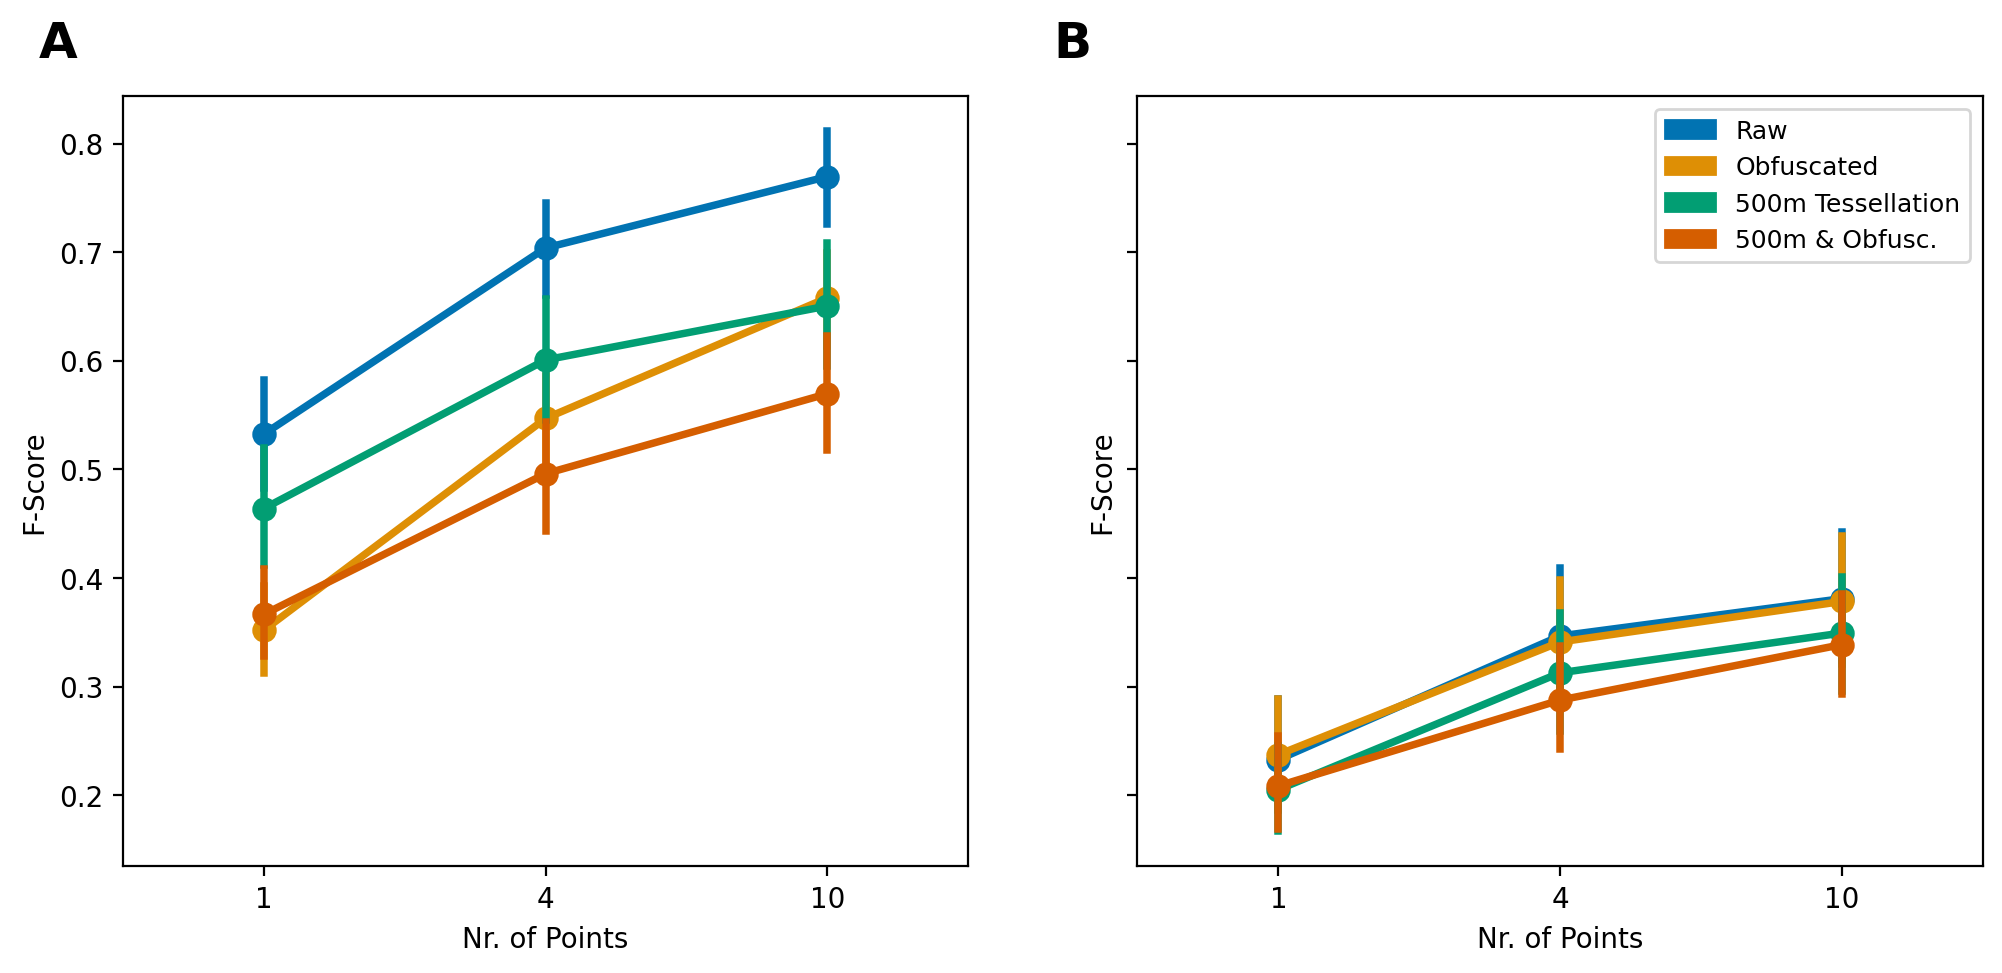

In [576]:
data_geolife = scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().query('data in ["geolife", "geolife_500tessellation", "geolife_private", "geolife_private_500tessellation"]')
data_freemove = scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().query('data in ["freemove", "freemove_private", "freemove_500tessellation", "freemove_private_500tessellation"]')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5), sharey=True, sharex=True)

ax1 = sns.pointplot(x="nr_points", y="fscore_user_mean", data=data_freemove, hue='data', ax=ax1)
ax2 = sns.pointplot(x="nr_points", y="fscore_user_mean", data=data_geolife, hue='data', ax=ax2)


ax2.set_xlabel("Nr. of Points")
ax1.set_xlabel("Nr. of Points")
ax2.set_ylabel("F-Score")
ax1.set_ylabel("F-Score")

ax1.legend([],[], frameon=False)

raw_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[0], label='Raw')
private_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[1], label='Obfuscated')
bigtes_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='500m Tessellation')
bigtes_private_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[3], label='500m & Obfusc.')
ax2.legend(handles=[raw_patch, private_patch, bigtes_patch, bigtes_private_patch], fontsize=9)

# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=18, fontweight='bold', ha='left', va='top')

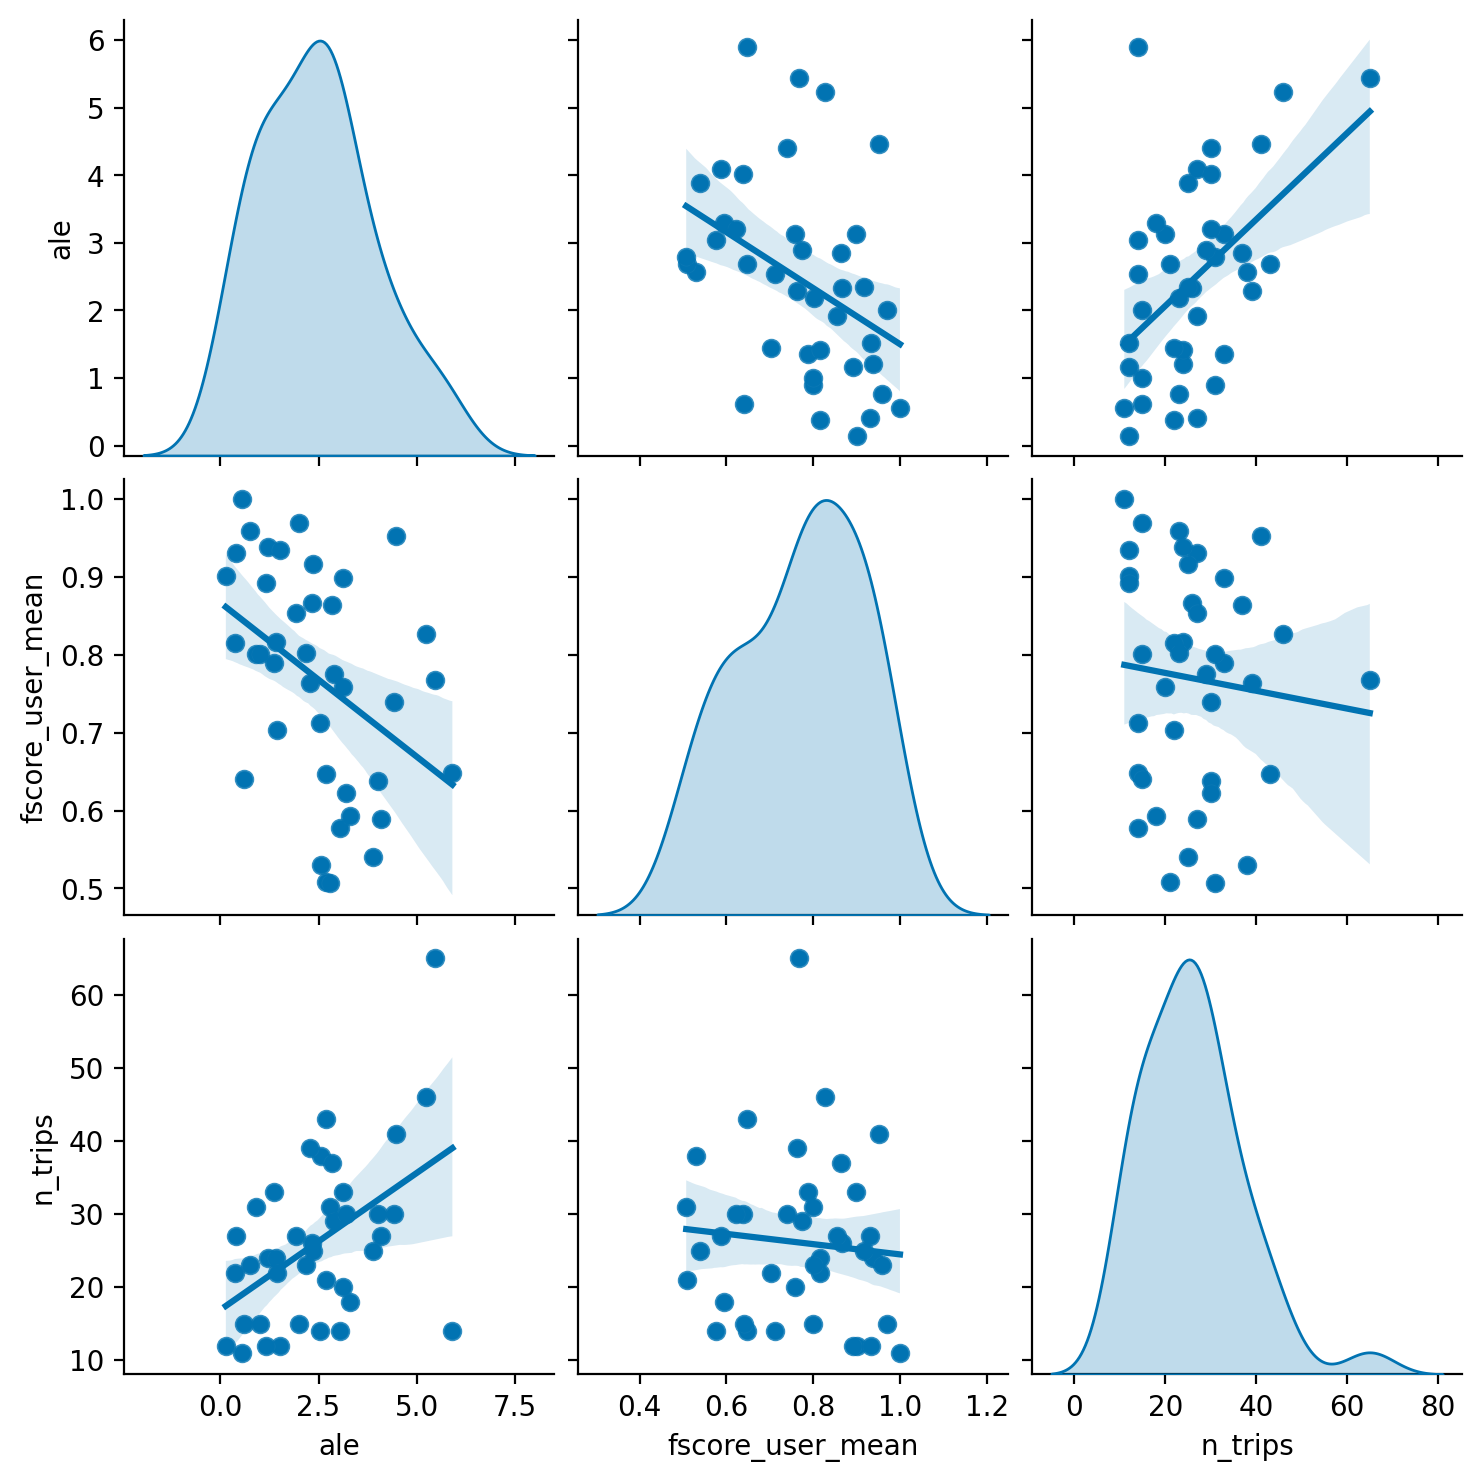

In [407]:
data_pairplot = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 10 and (data == "freemove")')
g = sns.pairplot(data_pairplot[['ale', 'fscore_user_mean', 'n_trips']], diag_kind="kde")
g.map_offdiag(sns.regplot)

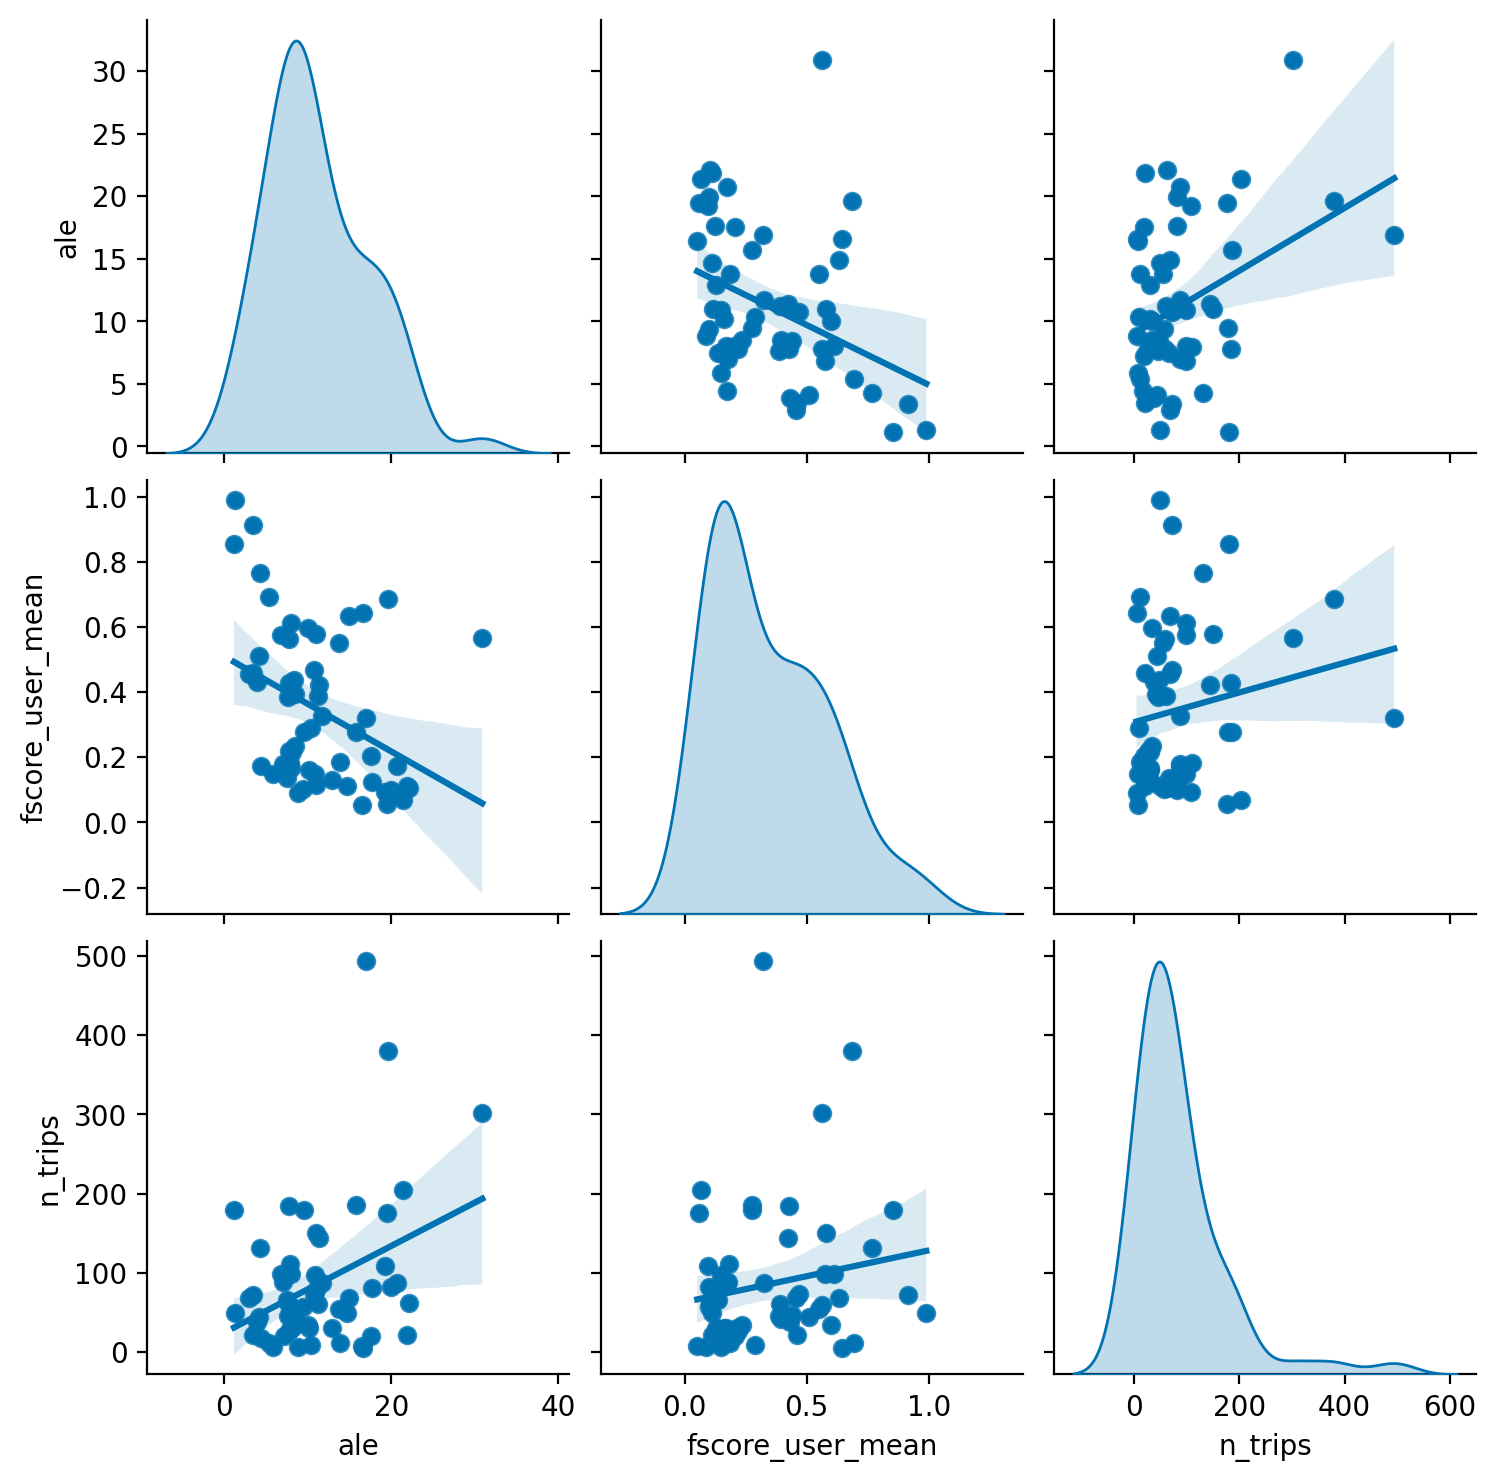

In [408]:
data_pairplot = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 4 and (data == "geolife")')
g = sns.pairplot(data_pairplot[['ale', 'fscore_user_mean', 'n_trips']], diag_kind="kde")
g.map_offdiag(sns.regplot)

Text(-0.16, 1.17, 'B')

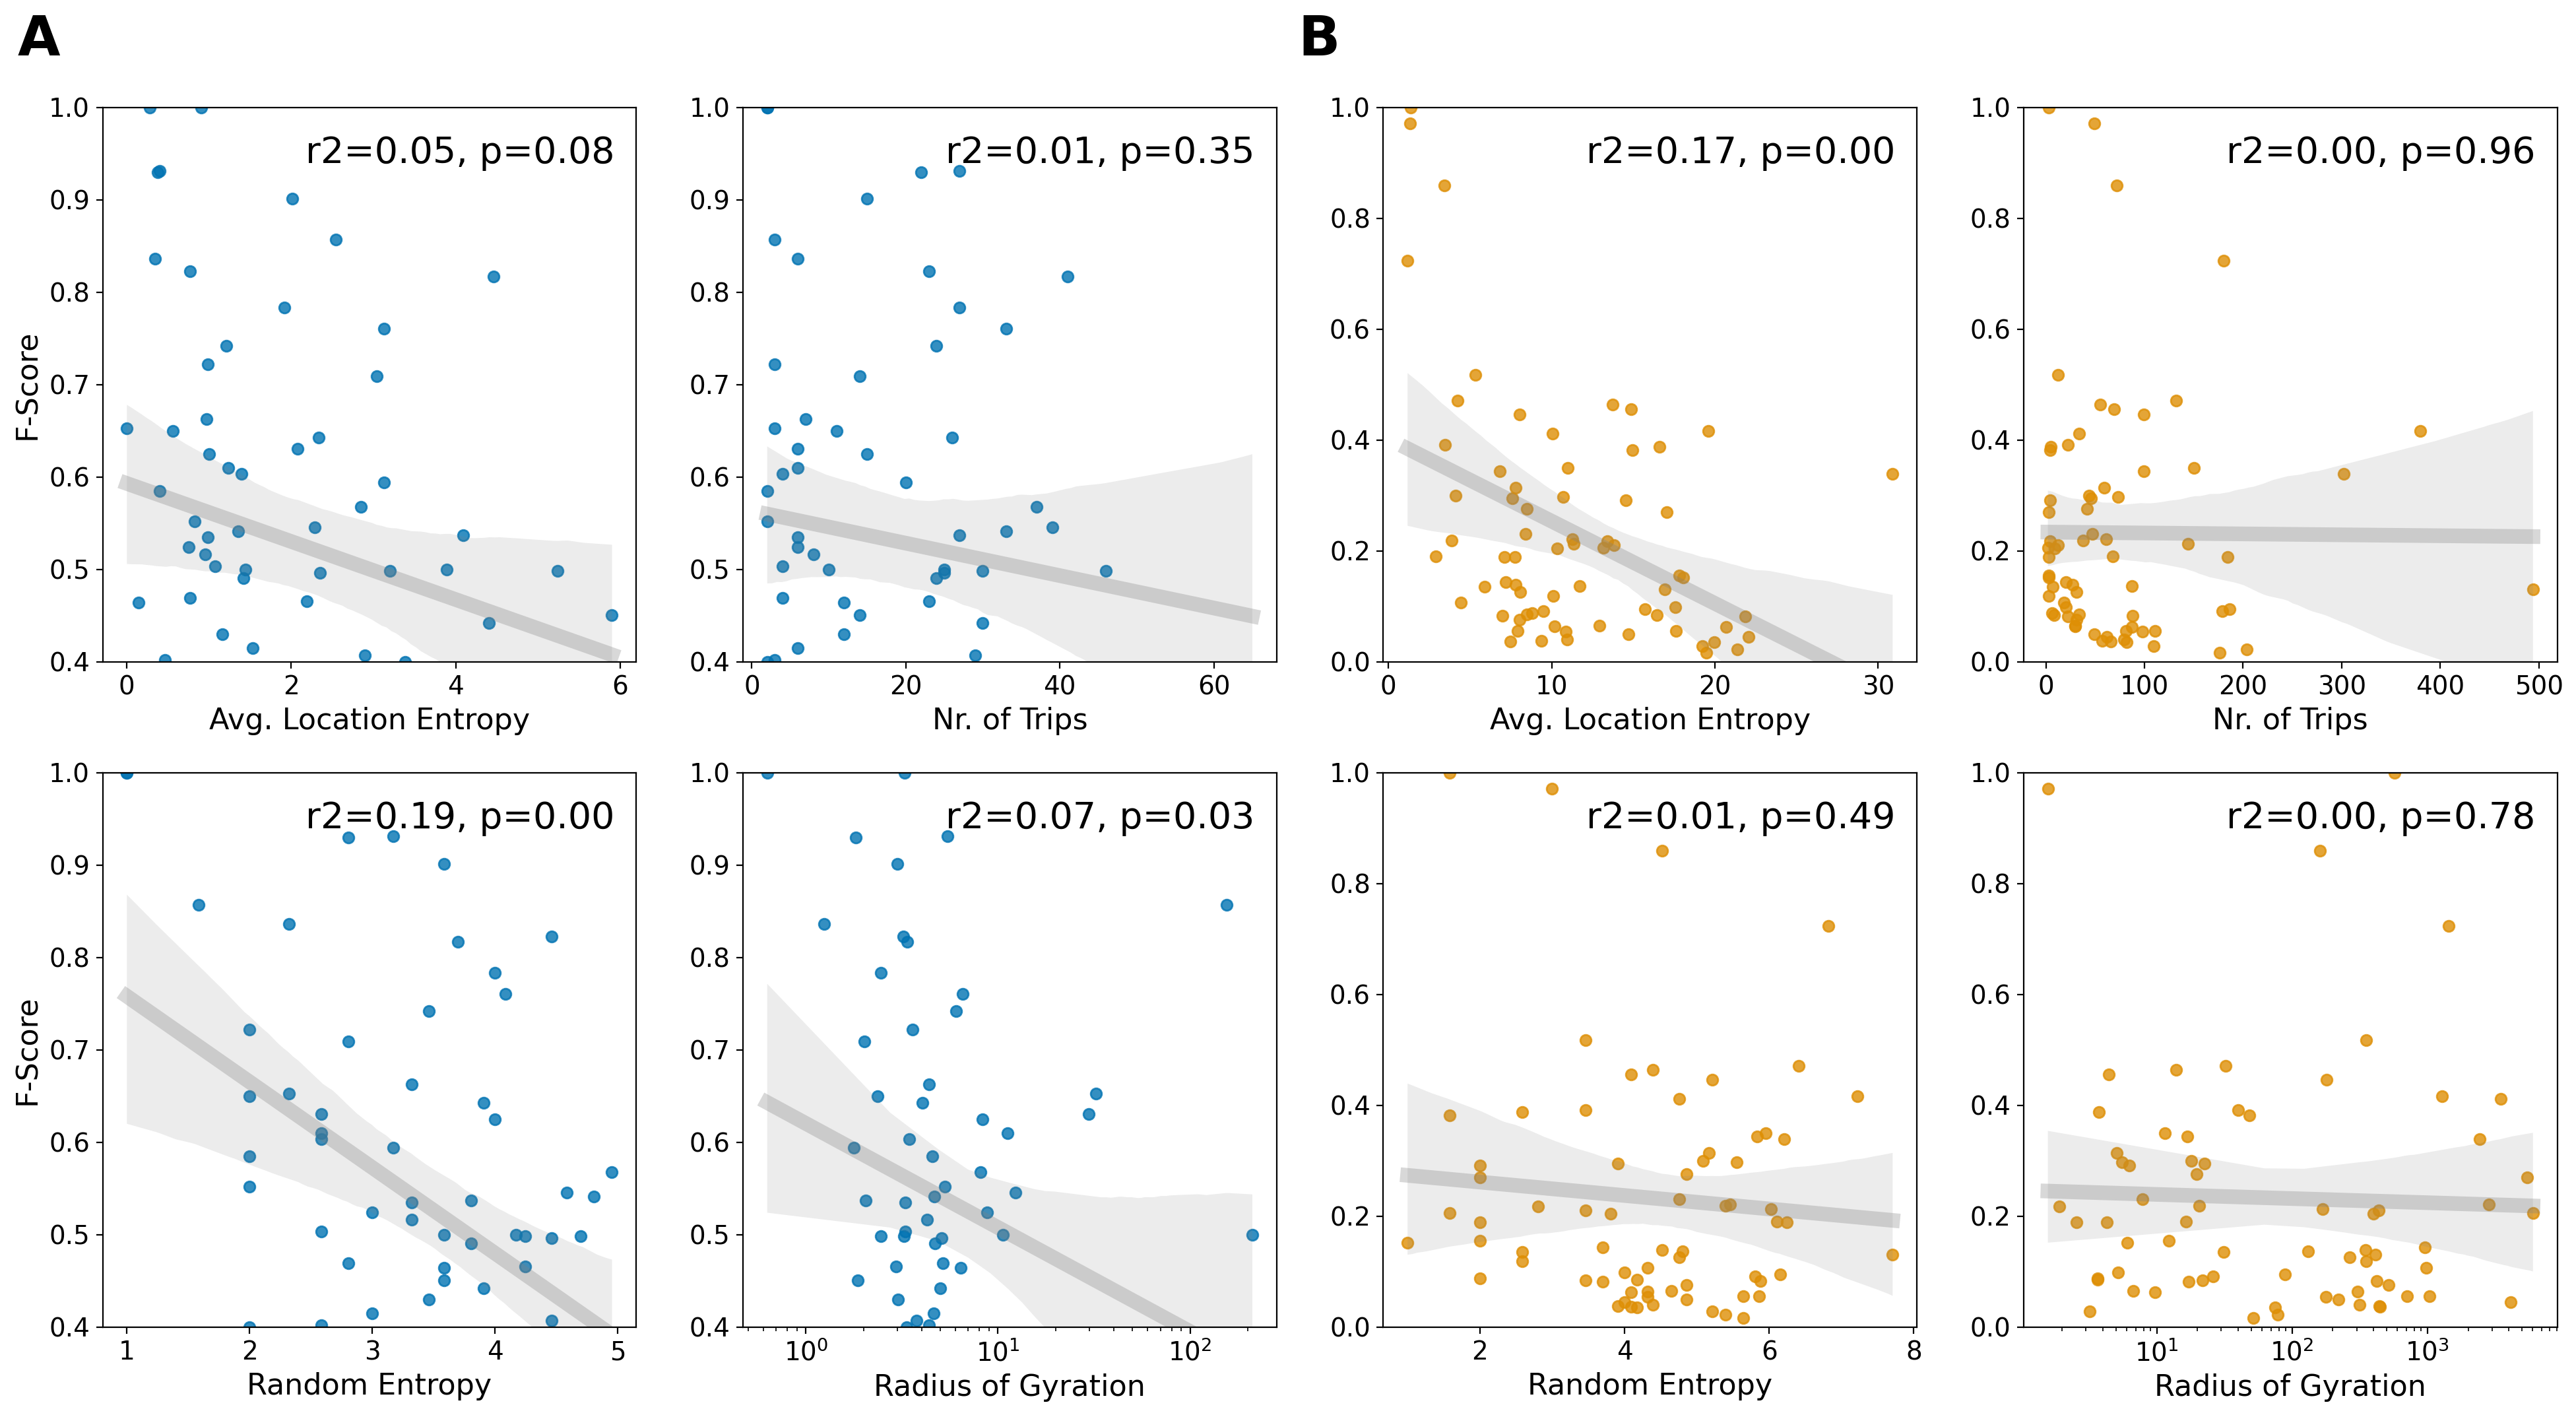

In [559]:
data_pairplot_geolife = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 1 and (data == "geolife")')
data_pairplot_freemove = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 1 and (data == "freemove")')


f, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=4, sharey=False, sharex=False, figsize=(24,12))

import scipy
import numpy as np

def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    ax.text(.38, .9, f'r2={rvalue ** 2:.2f}, p={np.round(pvalue,2):.2f}', transform=ax.transAxes, fontsize=20)

ax = sns.regplot(
            x='ale', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[0])
annotate(ax_1[0], data_pairplot_freemove, x='ale', y='fscore_user_mean')

ax = sns.regplot(
            x='n_trips', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[1])
annotate(ax_1[1], data_pairplot_freemove, x='n_trips', y='fscore_user_mean')

ax = sns.regplot(
            x='rand_entropy', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_2[0])
annotate(ax_2[0], data_pairplot_freemove, x='rand_entropy', y='fscore_user_mean')

#Slope is the change in Y when the log(X) changes by 1.0 (so X changes by a factor of 10)
ax = sns.regplot(
            x='radius_of_gyration', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            ax=ax_2[1],
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            logx=True)

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=np.log(data_pairplot_freemove['radius_of_gyration']), y=data_pairplot_freemove['fscore_user_mean'])
ax_2[1].text(.38, .9, f'r2={rvalue ** 2:.2f}, p={np.round(pvalue,2):.2f}', transform=ax.transAxes, fontsize=20)
ax_2[1].set(xscale="log")


ax = sns.regplot(
            x='ale', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[2])
annotate(ax_1[2], data_pairplot_geolife, x='ale', y='fscore_user_mean')

ax = sns.regplot(
            x='n_trips', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[3])
annotate(ax_1[3], data_pairplot_geolife, x='n_trips', y='fscore_user_mean')

ax = sns.regplot(
            x='rand_entropy', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_2[2])
annotate(ax_2[2], data_pairplot_geolife, x='rand_entropy', y='fscore_user_mean')

#Slope is the change in Y when the log(X) changes by 1.0 (so X changes by a factor of 10)
ax = sns.regplot(
            x='radius_of_gyration', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            ax=ax_2[3],
            logx=True,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'})

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=np.log(data_pairplot_geolife['radius_of_gyration']), y=data_pairplot_geolife['fscore_user_mean'])
ax_2[3].text(.38, .9, f'r2={rvalue ** 2:.2f}, p={np.round(pvalue,2):.2g}', transform=ax.transAxes, fontsize=20)
ax_2[3].set(xscale="log")

fontsize = 16
ax_1[0].set_xlabel('Avg. Location Entropy', fontsize=fontsize)
ax_1[1].set_xlabel('Nr. of Trips', fontsize=fontsize)
ax_1[2].set_xlabel('Avg. Location Entropy', fontsize=fontsize)
ax_1[3].set_xlabel('Nr. of Trips', fontsize=fontsize)

ax_2[0].set_xlabel('Random Entropy', fontsize=fontsize)
ax_2[1].set_xlabel('Radius of Gyration', fontsize=fontsize)
ax_2[2].set_xlabel('Random Entropy', fontsize=fontsize)
ax_2[3].set_xlabel('Radius of Gyration', fontsize=fontsize)

ax_1[0].set_ylabel('F-Score', fontsize=fontsize)
ax_1[1].set_ylabel('', fontsize=fontsize)
ax_1[2].set_ylabel('', fontsize=fontsize)
ax_1[3].set_ylabel('', fontsize=fontsize)
ax_2[0].set_ylabel('F-Score', fontsize=fontsize)
ax_2[1].set_ylabel('', fontsize=fontsize)
ax_2[2].set_ylabel('', fontsize=fontsize)
ax_2[3].set_ylabel('', fontsize=fontsize)



ax1.set_ylabel('freemove Users', fontsize=fontsize)
ax2.set_ylabel('GeoLife Users', fontsize=fontsize)
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax_1[0].set_ylim(0.4,1)
ax_1[1].set_ylim(0.4,1)
ax_2[0].set_ylim(0.4,1)
ax_2[1].set_ylim(0.4,1)

ax_1[2].set_ylim(0,1)
ax_1[3].set_ylim(0,1)
ax_2[2].set_ylim(0,1)
ax_2[3].set_ylim(0,1)

labelsize=14
ax_1[0].tick_params(labelsize=labelsize)
ax_1[1].tick_params(labelsize=labelsize)
ax_1[2].tick_params(labelsize=labelsize)
ax_1[3].tick_params(labelsize=labelsize)
ax_2[0].tick_params(labelsize=labelsize)
ax_2[1].tick_params(labelsize=labelsize)
ax_2[2].tick_params(labelsize=labelsize)
ax_2[3].tick_params(labelsize=labelsize)


ax_1[0].text(-0.16, 1.17, chr(65), transform=ax_1[0].transAxes, fontsize=30, fontweight='bold', ha='left', va='top')
ax_1[2].text(-0.16, 1.17, chr(65+1), transform=ax_1[2].transAxes, fontsize=30, fontweight='bold', ha='left', va='top')


In [363]:
data_hour_of_day

,data,user_id,precision,recall,pr_mean,f_score,nr_points,rand_entropy,ale,n_trips,hour_of_day,uid,radius_of_gyration,fscore_user_mean
495800,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16348.0,4.043032,0.830248
495801,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16349.0,3.867014,0.830248
495802,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16353.0,2.449512,0.830248
495803,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16354.0,1.871242,0.830248
495804,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16356.0,5.025835,0.830248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895395,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17267.0,8.766260,0.765082
895396,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17268.0,2.362354,0.765082
895397,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17269.0,5.920504,0.765082
895398,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17272.0,0.012543,0.765082


<Axes: xlabel='hour_of_day', ylabel='Density'>

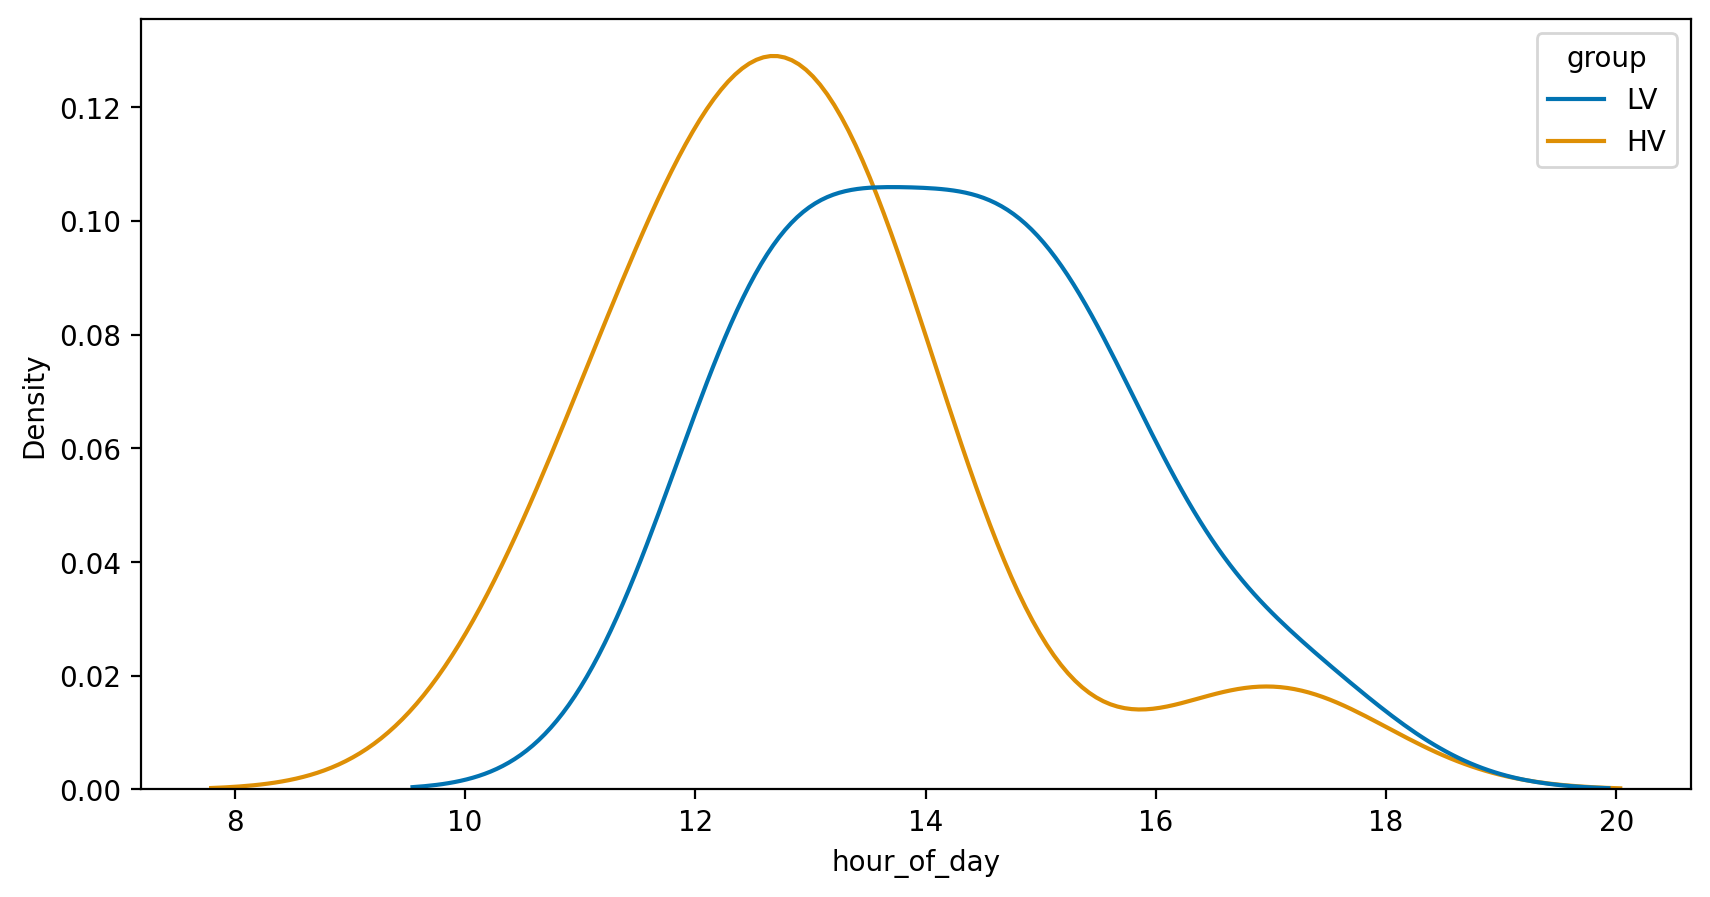

In [562]:
data_hour_of_day = scores.groupby(['user_id', 'data', 'nr_points']).mean().query('data == "freemove" and nr_points==4').copy()
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean >= data_hour_of_day.fscore_user_mean.quantile(0.8), 'group'] = "HV"
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean <= data_hour_of_day.fscore_user_mean.quantile(0.2),'group'] = "LV"


sns.kdeplot(data=data_hour_of_day, x="hour_of_day", hue="group")


<Axes: xlabel='hour_of_day', ylabel='Density'>

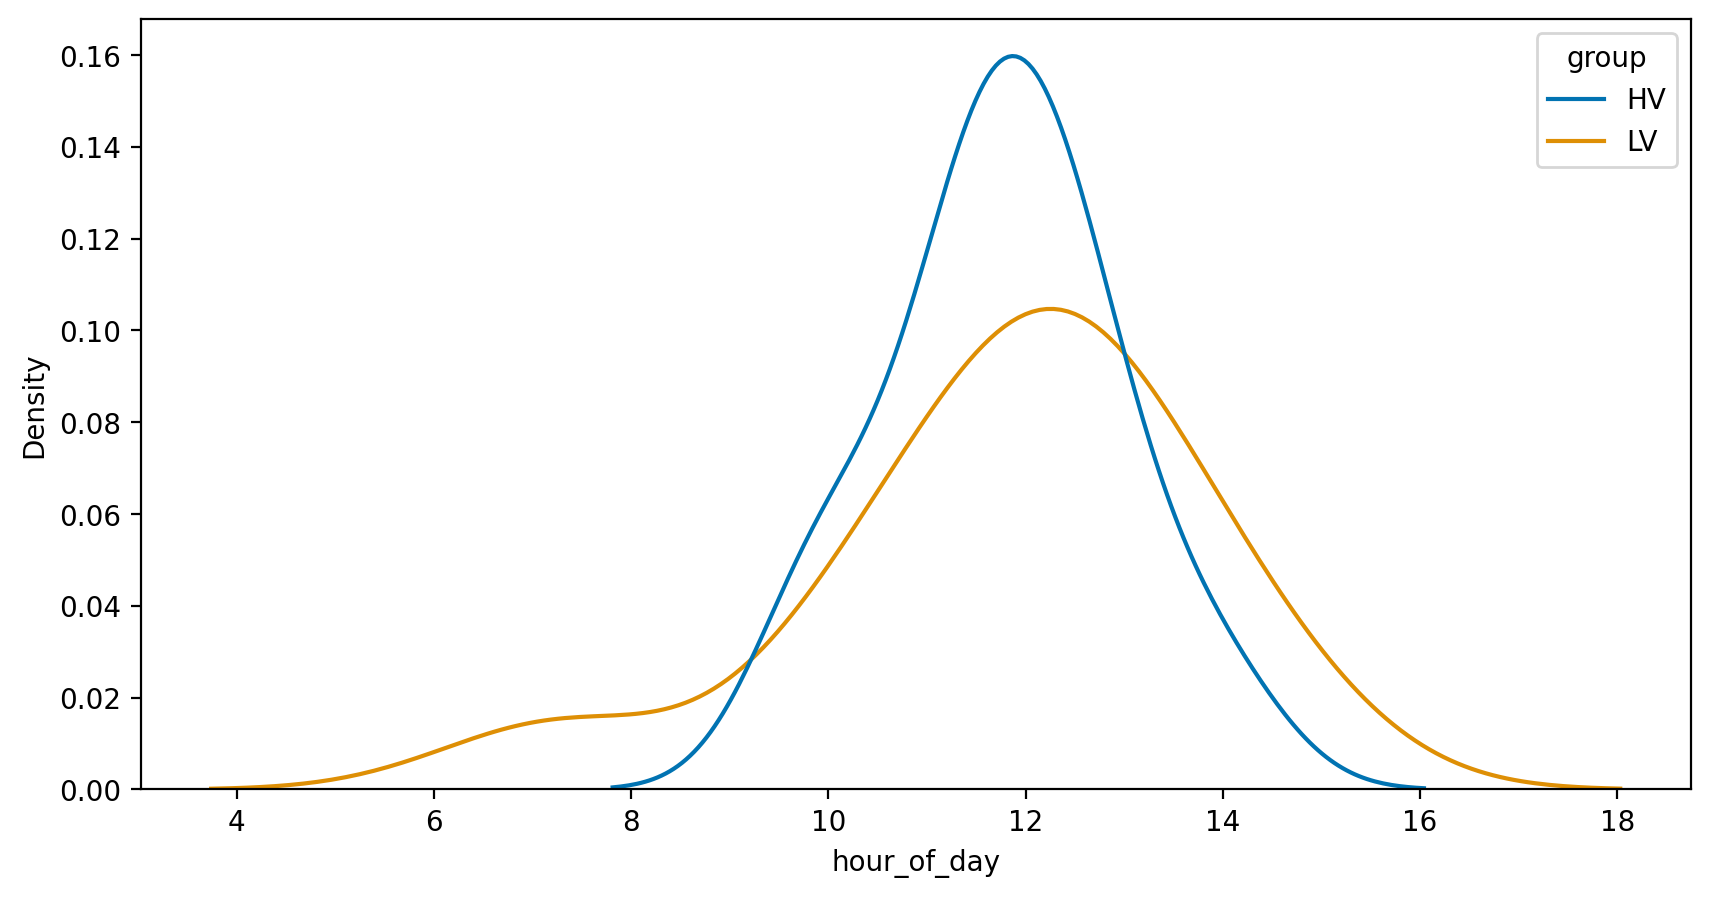

In [563]:
data_hour_of_day = scores.groupby(['user_id', 'data', 'nr_points']).mean().query('data == "geolife" and nr_points==4').copy()
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean >= data_hour_of_day.fscore_user_mean.quantile(0.8), 'group'] = "HV"
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean <= data_hour_of_day.fscore_user_mean.quantile(0.2),'group'] = "LV"


sns.kdeplot(data=data_hour_of_day, x="hour_of_day", hue="group")
